In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import pickle
import time
import sklearn


In [2]:
SCRATCH_DIR = "/scratch/siads696f23_class_root/siads696f23_class/psollars"

In [3]:
start_time = time.time()
df = pd.read_parquet(f"{SCRATCH_DIR}/predictive_features_ORD_2019.parquet")
end_time = time.time()

print(f"Elapsed time: {(end_time - start_time):.4f} seconds")

Elapsed time: 0.5107 seconds


In [4]:
# WN    Southwest Airlines Co.
# DL    Delta Air Lines, Inc.
# AA    American Airlines Inc.
# OO    SkyWest Airlines
# UA    United Airlines, Inc.
# YX    Republic Airways Inc
# MQ    Envoy Air Inc.
# B6    Jetblue Airways Corporation
# OH    PSA Airlines, Inc.
# AS    Alaska Airlines Inc.
# 9E    Endeavor Air
# YV    Mesa Airlines, Inc.
# NK    Spirit Airlines
# F9    Frontier Airlines, Inc.
# EV    Tatonduk Outfitters Limited dba Eve Air Alaska dba Everts Air Cargo
# G4    Allegiant Air LLC
# HA    Hawaiian Airlines, Inc.

df.value_counts("Reporting_Airline")

Reporting_Airline
UA    155218
MQ    131506
AA    129637
OO    122376
YX     27279
DL     26439
EV     24488
NK     19635
AS      6627
F9      6164
B6      5150
9E      4521
OH      1004
Name: count, dtype: int64

In [5]:
united_df = df[df["Reporting_Airline"].eq("UA")].drop("Reporting_Airline", axis=1)

united_df

,Month,DayOfWeek,Tail_Number,CRSDepTime,CRSArrTime,DistanceGroup,YEAR MFR,engine_manufacturer,engine_model,aircraft_manufacturer,aircraft_model,Origin_LATITUDE,Origin_LONGITUDE,Dest_LATITUDE,Dest_LONGITUDE,delayed
25272188,1,2,75861,1315,1932,8,2001,ROLLS-ROYC,RB-211 SERIES,BOEING,757-33N,37.618889,-122.375556,41.976944,-87.908056,True
25272196,1,2,12754,1000,1144,3,2002,CFM INTL,CFM56-7B22,BOEING,737-700,40.777222,-73.872500,41.976944,-87.908056,False
25272197,1,2,68880,1430,1650,2,2015,CFM INTL,CFM56-7B27E,BOEING,737-924ER,41.976944,-87.908056,39.996944,-82.892222,True
25272202,1,2,75858,1011,1200,4,2004,ROLLS-ROYC,RB-211 SERIES,BOEING,757-324,41.976944,-87.908056,39.861667,-104.673056,True
25272222,1,2,33284,1423,2024,7,2004,CFM INTL.,CFM56 SERIES,BOEING,737-824,32.733611,-117.189722,41.976944,-87.908056,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32219984,12,6,420UA,1747,2014,5,1994,IAE,V2500SERIES,AIRBUS INDUSTRIE,A320-232,25.795278,-80.290000,41.976944,-87.908056,True
32219989,12,6,66825,0755,1049,4,2014,CFM INTL,CFM56-7B27E,BOEING,737-924ER,41.976944,-87.908056,29.984444,-95.341389,False
32219991,12,6,14235,2324,0510,7,1999,CFM INTL.,CFM56 SERIES,BOEING,737-824,45.588611,-122.596944,41.976944,-87.908056,False
32219994,12,6,37413,0745,1145,5,2008,CFM INTL,CFM56-7B26,BOEING,737-924ER,41.976944,-87.908056,26.536111,-81.755278,False


In [6]:
num_cols = [
    "CRSDepTime",
    "CRSArrTime",
    "Origin_LATITUDE",
    "Origin_LONGITUDE",
    "Dest_LATITUDE",
    "Dest_LONGITUDE",
]

cat_cols = [
    "Month",
    "DayOfWeek",
    # "Reporting_Airline",
    "Tail_Number",
    "DistanceGroup",
    "YEAR MFR",
    "engine_manufacturer",
    "engine_model",
    "aircraft_manufacturer",
    "aircraft_model",
]

In [7]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import warnings

warnings.filterwarnings(action="ignore", category=FutureWarning)

start_time = time.time()

X = united_df.drop("delayed", axis=1)
y = united_df["delayed"]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(), cat_cols),
    ]
)

X_transformed = preprocessor.fit_transform(X)

end_time = time.time()

print(f"Elapsed time: {(end_time - start_time):.4f} seconds")

Elapsed time: 0.5415 seconds


In [8]:
from sklearn.model_selection import train_test_split

start_time = time.time()

X_train, X_test, y_train, y_test = train_test_split(
    X_transformed, y, test_size=0.2, random_state=42
)

end_time = time.time()

print(f"Elapsed time: {(end_time - start_time):.4f} seconds")

Elapsed time: 0.0258 seconds


In [9]:
from imblearn.over_sampling import SMOTE

start_time = time.time()

smote = SMOTE(random_state=42)

X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

end_time = time.time()

print(f"Elapsed time: {(end_time - start_time):.4f} seconds")

Elapsed time: 163.1519 seconds


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, recall_score
from sklearn.model_selection import GridSearchCV

scorer = make_scorer(recall_score)

grid_search = GridSearchCV(
    LogisticRegression(solver="saga", max_iter=1000), param_grid={}, scoring=scorer
)

grid_search.fit(X_train_res, y_train_res)

grid_search

GridSearchCV(estimator=LogisticRegression(max_iter=1000, solver='saga'),
             param_grid={}, scoring=make_scorer(recall_score))

In [20]:
y_pred = grid_search.predict(X_test)

In [11]:
from sklearn.linear_model import LogisticRegression

start_time = time.time()

logistic_regression = LogisticRegression(solver="saga", max_iter=1000)
logistic_regression.fit(X_train_res, y_train_res)

end_time = time.time()

print(f"Elapsed time: {(end_time - start_time):.4f} seconds")

Elapsed time: 14.6754 seconds


In [18]:
logistic_regression

LogisticRegression(max_iter=1000, solver='saga')

In [12]:
# import pickle


# with open(f"{SCRATCH_DIR}/07_logistic_regression_predictive_features_2019_ORD_UA.pkl", "wb") as f:
#     pickle.dump(logistic_regression, f)

In [13]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    precision_recall_curve,
)

y_pred = logistic_regression.predict(X_test)

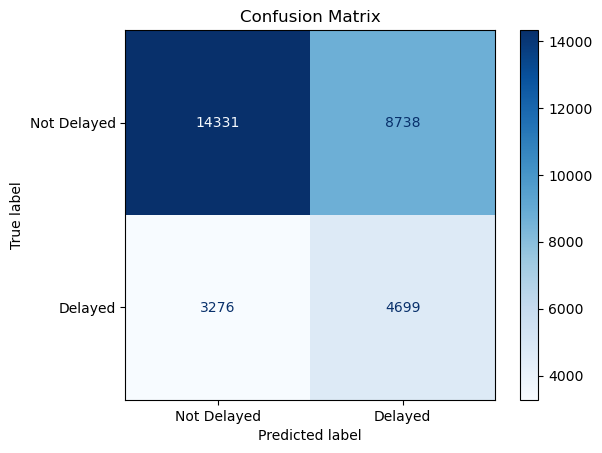

In [21]:
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(
    confusion_matrix=cm, display_labels=["Not Delayed", "Delayed"]
).plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

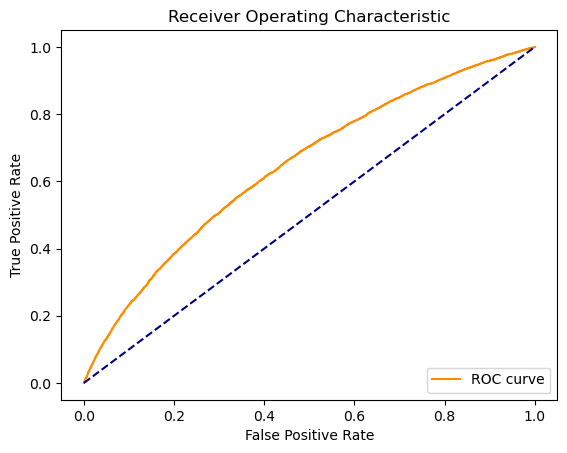

In [22]:
fpr, tpr, _ = roc_curve(y_test, logistic_regression.predict_proba(X_test)[:, 1])

plt.figure()
plt.plot(fpr, tpr, color="darkorange", label="ROC curve")
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()

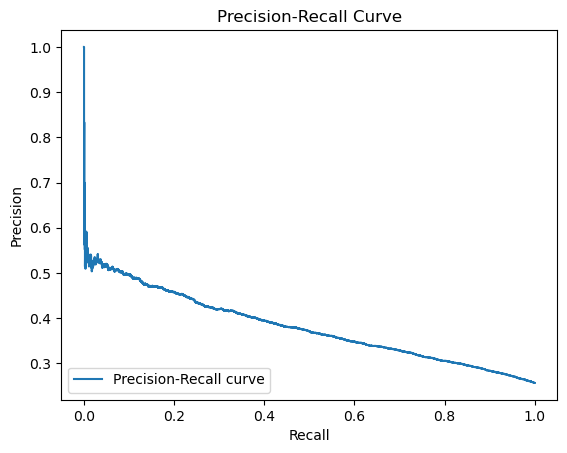

In [23]:
precision, recall, _ = precision_recall_curve(
    y_test, logistic_regression.predict_proba(X_test)[:, 1]
)

plt.figure()
plt.plot(recall, precision, label="Precision-Recall curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower left")
plt.show()

In [24]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

metrics_scores = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
}
df_metrics = pd.DataFrame(list(metrics_scores.items()), columns=["Metric", "Score"])

fig = px.bar(
    df_metrics,
    x="Score",
    y="Metric",
    orientation="h",
    color="Metric",
    text="Score",
    title="Evaluation Metrics",
)

fig.update_layout(showlegend=False)

fig.show()